## 1. Generating a Challenging Synthetic Dataset

We'll start by creating a synthetic dataset designed to be difficult for a standard linear regression model. This dataset will have:
1.  **High Dimensionality:** 150 features in total.
2.  **High Noise:** 100 of the features will be pure random noise, unrelated to the target variable.
3.  **Strong Multicollinearity:** 25 of the features will be created as close linear combinations of other features.

The code in the `dataset_generator.ipynb` creates this data, which we then save as `dataset.csv` for our analysis.

R^2 Score for Linear Regression: 0.7410183335246842
R^2 Score for Lasso Regression: 0.9901476660336155
R^2 Score for Ridge Regression: 0.9085693240000811


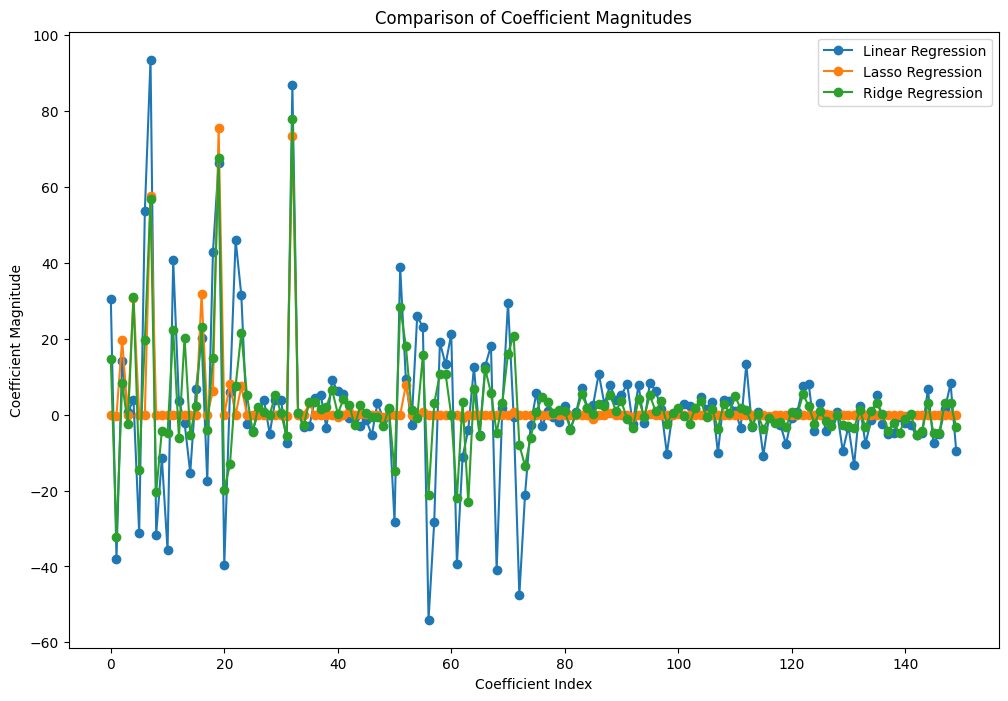

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with more features and very high noise
X, y, coef = make_regression(n_samples=200, n_features=50, noise=10.0, coef=True, random_state=42)
noise = np.random.randn(200, 100)  # Substantially more noise features
X = np.hstack([X, noise])  # Add noise features

# Introduce stronger multicollinearity
for i in range(50, 75):  # Create strong multicollinearity in 25 features
    X[:, i] = X[:, i - 50] + np.random.normal(0, 0.2, 200)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=1.0)  # Adjust alpha for Lasso
ridge_model = Ridge(alpha=0.01)  # Adjust alpha for Ridge

# Fit the models
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Predict using the models
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R^2 scores
r2_linear = r2_score(y_test, y_pred_linear)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"R^2 Score for Linear Regression: {r2_linear}")
print(f"R^2 Score for Lasso Regression: {r2_lasso}")
print(f"R^2 Score for Ridge Regression: {r2_ridge}")

# Plotting the coefficients for comparison
plt.figure(figsize=(12, 8))
plt.plot(range(len(linear_model.coef_)), linear_model.coef_, label='Linear Regression', marker='o')
plt.plot(range(len(lasso_model.coef_)), lasso_model.coef_, label='Lasso Regression', marker='o')
plt.plot(range(len(ridge_model.coef_)), ridge_model.coef_, label='Ridge Regression', marker='o')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.title('Comparison of Coefficient Magnitudes')
plt.legend()
plt.show()

From this plot, we can clearly see:
* **Linear Regression:** Has very large, erratic coefficients, a classic sign of overfitting.
* **Ridge Regression:** Shrinks all coefficients towards zero, effectively dampening their influence, especially for correlated features.
* **Lasso Regression:** Drastically reduces the complexity of the model by forcing many of the coefficients to be **exactly zero**. This is why Lasso is known for its ability to perform automatic feature selection.